In [1]:
%matplotlib inline  
import math
import matplotlib.pyplot as plt
import numpy as np
import fiona
from shapely.geometry import shape
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
def tan_theta_to_bearing(theta):
    return (90 - theta) + 360 % 360

def get_bearing(pnt0, pnt1):
    x0, y0 = pnt0
    x1, y1 = pnt1
    dx = x1 - x0
    dy = y1 - y0
    radian = math.atan2(dy, dx)
    theta = math.degrees(radian)
    return tan_theta_to_bearing(theta)

def get_length(pnt0, pnt1):
    x0, y0 = pnt0
    x1, y1 = pnt1
    dx = x1 - x0
    dy = y1 - y0
    
    return (dx ** 2 + dy ** 2) ** 0.5
    

In [3]:
n = 60
y = np.zeros(n, dtype=np.float64)
width = 360 / n
print(width)

6.0


In [4]:
c = fiona.open('./road/shenzhen_road.shp')
for fea in c:
    geom = shape(fea['geometry'])    
    pre_pnt = geom.coords[0]
    for pnt in geom.coords[1:]:
        #print(pre_pnt, pnt)
        bearing = get_bearing(pre_pnt, pnt)
        length = get_length(pre_pnt, pnt)
        k = int(bearing // width)
        #print(bearing)
        #print(key)
        #print(length)
        y[k] += length
        pre_pnt = pnt
    
c.close()
frequency = y / y.sum()
frequency

array([0.01845617, 0.01468525, 0.01260787, 0.01201443, 0.01295758,
       0.01151849, 0.01273997, 0.01642654, 0.01411669, 0.01406938,
       0.01471472, 0.01549655, 0.01616277, 0.01792541, 0.04355502,
       0.01844815, 0.01329736, 0.01402584, 0.01268152, 0.01294726,
       0.0120557 , 0.01532288, 0.01897903, 0.0155072 , 0.0149005 ,
       0.01670852, 0.0142186 , 0.0149297 , 0.01702311, 0.0407248 ,
       0.0186759 , 0.01450926, 0.01265169, 0.01188393, 0.01311263,
       0.01134026, 0.01293856, 0.01622846, 0.01398084, 0.01395825,
       0.01552556, 0.0156379 , 0.01617858, 0.01788568, 0.04341379,
       0.01873929, 0.01346173, 0.01393086, 0.01261008, 0.01325195,
       0.01222594, 0.01520399, 0.01914564, 0.01561499, 0.014843  ,
       0.01672272, 0.01449424, 0.0148413 , 0.01714077, 0.04063521])

In [5]:

x = np.array([ang * 2 * np.pi / n for ang in range(0, n)])
width = width * np.pi / 180.0





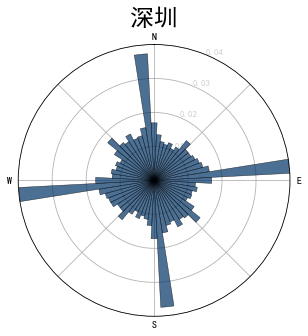

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(5,5), subplot_kw={'projection':'polar'})

ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')



bars = ax.bar(x, height=frequency, width=width, align='center', bottom=0, zorder=2,
                  color='#003366', edgecolor='k', linewidth=0.5, alpha=0.7)

ax.set_ylim(top=frequency.max())


title_font = {'family':'sans-serif', 'size':24, 'weight':'bold'}
ax.set_title(u'深圳', y=1.05, fontdict=title_font)
ax.set_yticks(np.linspace(0, max(ax.get_ylim()), 5))
yticklabels = ['{:.2f}'.format(y) for y in ax.get_yticks()]
yticklabels[0] = ''
ytick_font = {'family':'sans-serif', 'size': 9, 'weight':'bold', 'alpha':0.2, 'zorder':3}
ax.set_yticklabels(labels=yticklabels, fontdict=ytick_font)
xticklabels = ['N', '', 'E', '', 'S', '', 'W', '']
xtick_font = {'family':'sans-serif', 'size':10, 'weight':'bold', 'alpha':1.0, 'zorder':3}
ax.set_xticklabels(labels=xticklabels, fontdict=xtick_font)
ax.tick_params(axis='x', which='major', pad=-2)